<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [2]:
taxi_pd = pd.read_csv('/Users/lukasjunger/PycharmProjects/MisraCourse/New-York-Taxi-Analysis/data/yellow_tripdata_2019-01.csv')

In [3]:
taxi_pd.shape

(7667792, 18)

In [4]:
taxi_pd.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [5]:
taxi_pd.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'], dtype='object')

In [6]:
# Only take the relevant columns
taxi_pd = taxi_pd[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 
                   'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]
taxi_pd

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,193,193,2,55.55
...,...,...,...,...,...,...,...,...,...
7667787,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,263,4,1,23.16
7667788,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,193,193,1,0.00
7667789,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,264,264,1,0.00
7667790,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,264,7,1,0.00


array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

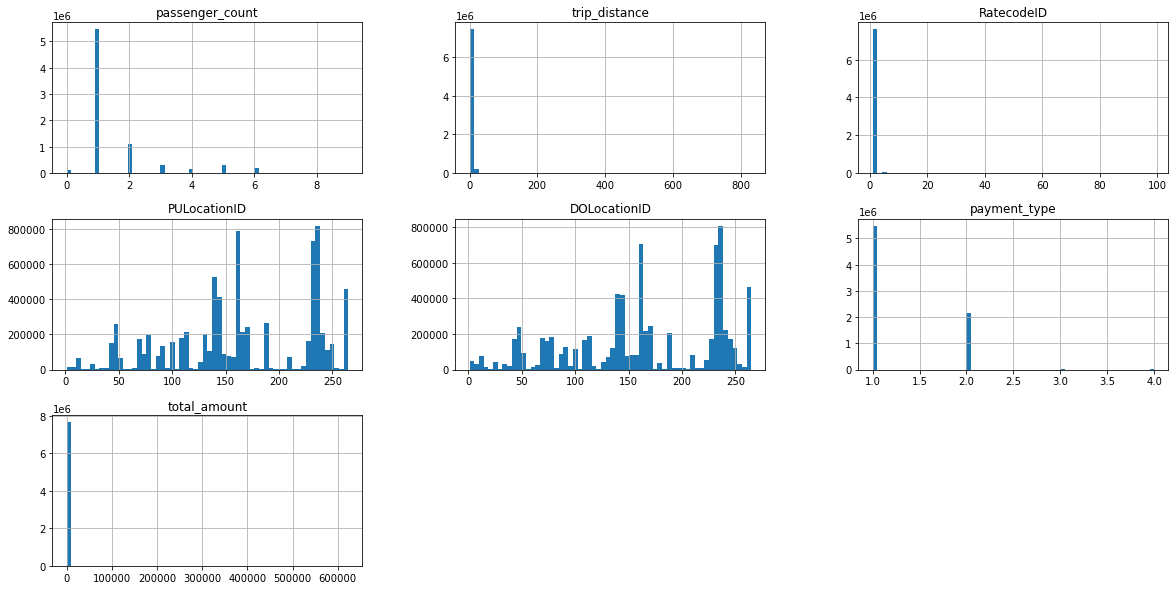

In [7]:
taxi_pd.hist(figsize=(20, 10), bins=60)

In [8]:
taxi_pd['RatecodeID'].value_counts()
taxi_pd['total_amount'].value_counts()

7.30      170464
7.80      167910
6.80      167882
8.30      161711
8.80      159059
           ...  
78.87          1
157.82         1
156.07         1
287.85         1
200.76         1
Name: total_amount, Length: 12191, dtype: int64

In [9]:
taxi_pd['DOLocationID'].value_counts()

236    334323
237    296185
161    293782
170    242037
162    232451
230    225336
142    214164
48     208624
234    204386
239    204350
141    202184
186    189486
163    175754
238    175310
79     168608
68     167144
107    162697
263    158297
164    154200
140    152042
264    149094
229    146563
246    140739
231    120771
249    120045
137    114948
100    114419
90     113317
233    112334
143    112216
262    108735
113    101569
75      97352
43      91934
50      86664
114     73628
158     72793
148     71211
151     67877
138     66384
13      62630
144     60969
74      59571
211     56934
87      56466
166     54916
132     53444
41      49288
125     36691
4       34855
232     34532
42      32641
224     31932
261     31838
7       28130
88      26743
24      26467
244     25789
145     24221
181     21720
33      20581
116     19514
209     19150
45      19061
226     18261
265     16817
255     15850
256     15246
112     13898
25      12905
223     12903
129   

In [10]:
taxi_pd['DOLocationID'].between(1, 265)

0          True
1          True
2          True
3          True
4          True
           ... 
7667787    True
7667788    True
7667789    True
7667790    True
7667791    True
Name: DOLocationID, Length: 7667792, dtype: bool

In [11]:
taxi_pd['total_amount'].value_counts()

7.30      170464
7.80      167910
6.80      167882
8.30      161711
8.80      159059
           ...  
78.87          1
157.82         1
156.07         1
287.85         1
200.76         1
Name: total_amount, Length: 12191, dtype: int64

A closer look on the data:

- passenger_count:
Seems legit. What is the meaning of some drives with zero=passenger_count? Maybe this means the taxi just delivered something?

- trip_distance:
There are many drives which only take a few kilometers. Seems reasonable.

- RatecodeID:
There is something wrong with the data! 252 times the RateCodeID was 99 which makes no sense.

- PULocationID & DOLocationID:
Seems to be fine. All values stand for a corresponding taxi zone.

- payment_type:
Seems to be fine. Most people pay cash or credit card.

- total_amount:
Seems to be fine. Most drives cost about 7-8 $. The most expensive drive was for 200.

<AxesSubplot:xlabel='index', ylabel='total_amount'>

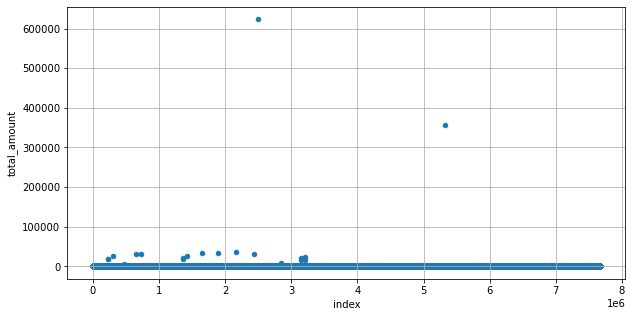

In [12]:
taxi_pd.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5), grid=True)

<AxesSubplot:xlabel='index', ylabel='total_amount'>

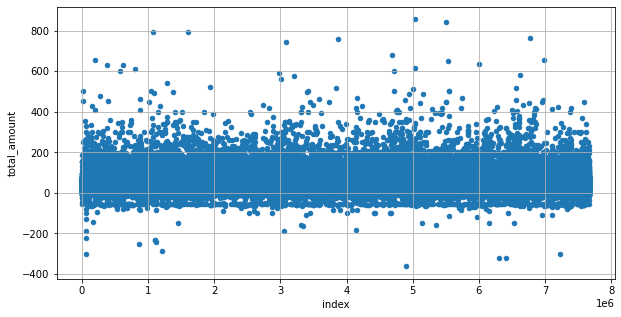

In [13]:
taxi_pd[taxi_pd['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5), grid=True)

There are two major things I have  to deal with:
- negative values
- absurd high values

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

(7131, 9)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

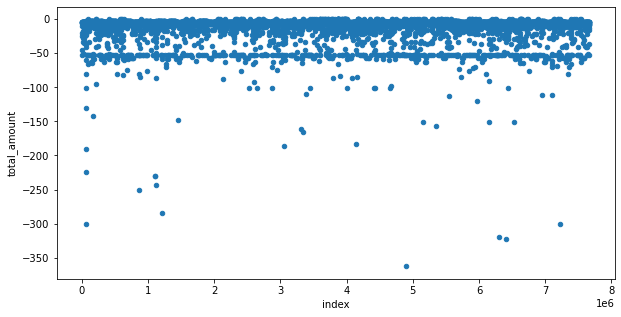

In [14]:
# How many negative values are there?
print(taxi_pd[taxi_pd['total_amount']<0].shape)

# Show all the negative values
taxi_pd[taxi_pd['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [15]:
# Show some rows with negative values at the total_amount column
taxi_pd[taxi_pd['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [16]:
# How many zeroes are there?
print(taxi_pd[taxi_pd['total_amount']==0].shape)

# Show some rows with zero as values at the total_amount column
taxi_pd[taxi_pd['total_amount']==0].head()

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


<AxesSubplot:>

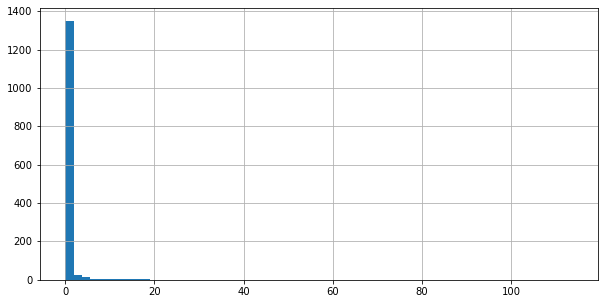

In [17]:
# Show how often the 'trip_distance' was zero when there was no total_amount
taxi_pd[taxi_pd['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [18]:
# Double check if the statment from the cell above is actually true
taxi_pd[taxi_pd['total_amount']==0]['trip_distance'].value_counts()
# It's is correct !!

0.00      1270
0.01         4
1.00         4
0.02         4
0.03         3
0.10         3
0.50         3
1.40         3
0.70         3
1.30         2
0.04         2
2.00         2
17.80        2
2.40         2
1.90         2
0.80         2
1.60         2
4.30         2
0.09         2
0.90         2
2.60         2
1.10         2
0.30         2
0.40         2
1.50         2
1.06         1
1.56         1
0.67         1
0.53         1
27.91        1
4.89         1
1.14         1
2.12         1
18.09        1
0.42         1
6.54         1
10.84        1
2.57         1
3.22         1
3.88         1
1.62         1
0.24         1
1.03         1
13.70        1
7.85         1
0.87         1
7.27         1
3.84         1
2.70         1
7.48         1
3.09         1
14.20        1
1.04         1
0.12         1
2.83         1
0.27         1
3.50         1
14.10        1
3.66         1
3.55         1
0.31         1
4.51         1
1.01         1
17.78        1
1.27         1
0.05         1
0.84      

### We can safely get rid of the negative values. What about the very high values?

(1166, 9)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

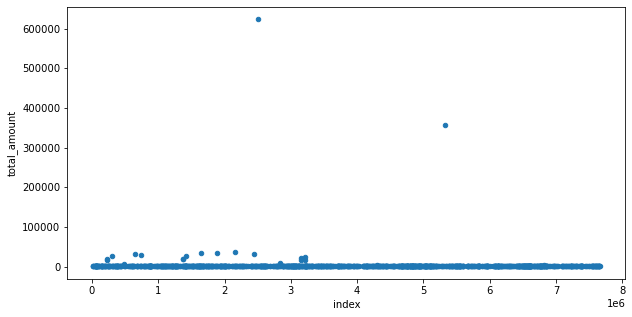

In [19]:
# How many values are there bigger than 200?
print(taxi_pd[taxi_pd['total_amount']>200].shape)

# Show all the values bigger than 200 for total_amount
taxi_pd[taxi_pd['total_amount']>200].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [20]:
# Show some rows with values > 200 at the total_amount column
taxi_pd[taxi_pd['total_amount']>200].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
11081,2019-01-01 00:41:25,2019-01-01 03:47:24,1,128.73,5,50,265,1,453.44
12931,2019-01-01 00:12:56,2019-01-01 00:13:21,1,0.00,5,234,234,1,251.00
13272,2018-11-28 17:05:35,2018-11-29 10:05:34,5,0.00,1,193,193,2,500.55
37440,2019-01-01 02:18:44,2019-01-01 02:19:42,2,0.00,5,265,265,1,222.95
38891,2019-01-01 02:36:54,2019-01-01 02:38:41,1,0.00,5,221,221,1,355.85


In [21]:
## Here the actual Data Cleaning Process happens:
taxi_data_filtered = taxi_pd[(taxi_pd['total_amount']>=0)&(taxi_pd['total_amount']<200)]

In [43]:
print(taxi_pd.shape)
taxi_data_filtered.shape

(7667792, 9)


(7659490, 9)

In [23]:
## My version for the Data cleaning assignment
# Get names of indexes for the column total_amount where it is negative/zero/>200
#total_amount_index = taxi_pd[(taxi_pd['total_amount']<0)&(taxi_pd['total_amount']==0)&(taxi_pd['total_amount']>200)].index
# Delete these row indexes from DataFrame
#taxi_pd.drop(total_amount_index, inplace=True)

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

## What are the steps of data preparation you are considering? Write them down as precisely as you can imagine. What is the form your data needs to be in before you can use it as training data for a model? Draw a table if you need to. (Hint: think of what you are trying to predict)


- Identify normal data & outliers
- Identifying columns that have the same value or no variance and removing them.
- Identifying duplicate rows of data and removing them.
- Marking empty values as missing.
- Imputing missing values using statistics or a learned model.

In [34]:
taxi_data_prepared = taxi_data_filtered.copy()

Making sure if everything is in the right type.

In [36]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [40]:
# Transform to datetime
taxi_data_prepared.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime'])
taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'])

In [41]:
# Convert to str because these columns/features are not relevant for the model
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [44]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

Transforming variables into the formats we need them

In [45]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [49]:
# We want seperate columns for the date/year/month/day/hour of the datetime, because it is better for the model later on.
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [50]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'passenger_count'}>],
       [<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>],
       [<AxesSubplot:title={'center':'transaction_year'}>,
        <AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>],
       [<AxesSubplot:title={'center':'transaction_hour'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

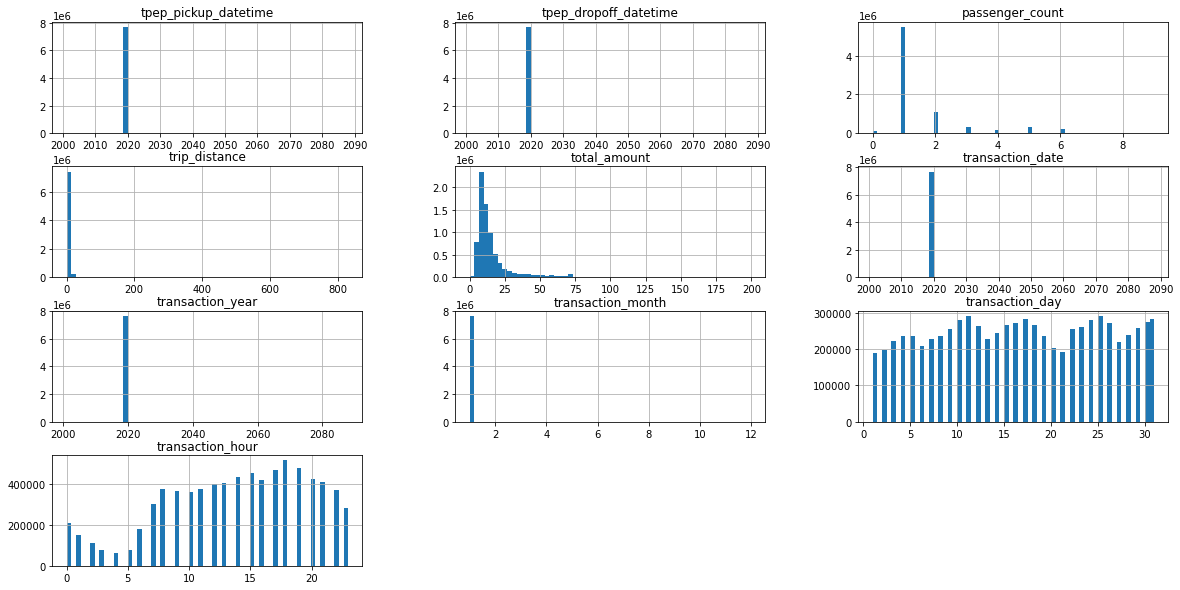

In [51]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [53]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

Noting down categorical and numerical columns

In [54]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [55]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


Aggregate data points

In [66]:
# Bring everything together which has the same PULocationID and date and calculate the mean of trip_distance&total_amount
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<AxesSubplot:>

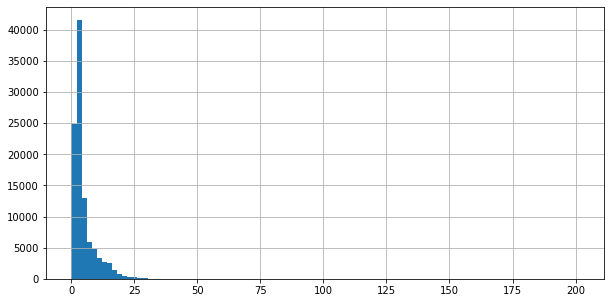

In [67]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10, 5))

<AxesSubplot:>

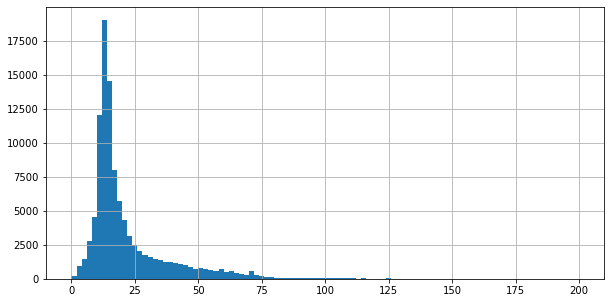

In [68]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10, 5))

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

## 7.1. Decision tree <a id='decision_tree'></a>

## 7.2. Random forest <a id='random_forest'></a>

## 7.3. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)